In [22]:
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.integrate
import scipy.interpolate

Function f(x) is set on the grid, find integral
$$\int\limits_a^b f(x)\sin kx \, dx$$
constructing spline for f(x) approximation


In [15]:
k = 50
I = np.arange(0, 5, 1, dtype = float)
X = np.arange(0, 5, 1, dtype = float)
Y = np.array([0.0, 0.5, 0.86603, 1.0, 0.86603])
Y1 = np.zeros(5)
for i in range(len(X)):
    Y1[i] = math.sin(math.pi*X[i]/6)
print(Y1)
Y2 = Y - Y1
print(Y2)

[0.        0.5       0.8660254 1.        0.8660254]
[0.00000000e+00 5.55111512e-17 4.59621556e-06 0.00000000e+00
 4.59621556e-06]


 We approximate $f(x)$ by function $g(x) = \sin (\frac{\pi x}{6})$
 $$\int_0^4 f(x) \sin (50x) \, dx = \int_0^4 (f(x) - g(x)) \sin (50x) \, dx + \int_0^4 g(x) \sin (50x) \, dx$$
 $$\int_0^4 g(x) \sin (50x) \, dx = \frac{1}{2}\cdot (\frac{\sin (4\alpha_1)}{\alpha_1} - \frac{\sin (4\alpha_2)}{\alpha_2})$$
 where $\alpha_1 = \frac{\pi}{6} - 50$, $\alpha_2 = \frac{\pi}{6} + 50$

In [20]:
#We see that with high accuracy f(x) = g(x)
H1 = math.pi/6.0 - 50
H2 = math.pi/6.0 + 50
I1 = (math.sin(4*H1)/H1 - math.sin(4*H2)/H2) /2.0
print(I1)

-0.008347802019152221


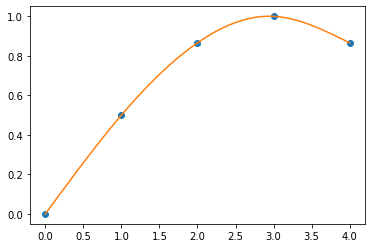

In [53]:
#Now turn to task and construct spline
F = scipy.interpolate.CubicSpline(X, Y, bc_type='natural')

N = 400000
A = np.zeros(N, dtype = float)
B = np.zeros(N, dtype = float) 
C = np.zeros(N, dtype = float)
C1 = np.zeros(N, dtype = float)
for i in range(N):
    A[i] = i/(N/4)
    B[i] = F(A[i])
    C[i] = B[i] * math.sin(50*A[i])
    C1[i] = math.sin(50*A[i])*math.sin(math.pi*A[i]/6)
fig = plt.figure()
plt.plot(X, Y, "o")
plt.plot(A, B)
plt.show()

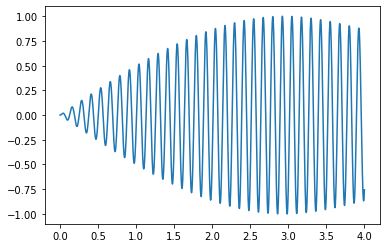

In [49]:
fig = plt.figure()
plt.plot(A, C)
plt.show()

In [54]:
# First with spline, second with g(x)
print(scipy.integrate.trapz(C, A))
print(scipy.integrate.trapz(C1, A))

-0.00836390883995227
-0.008340237799249736
